In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import pyplot
import datetime 
from pandas.plotting import autocorrelation_plot

In [2]:
desks = pd.read_csv("desks.csv")

desks.head()

,id,building,floor,orientation,deskNo
0,127,A,1,NE,20
1,128,A,1,NE,19
2,129,A,1,NE,17
3,130,A,1,NE,18
4,131,A,1,NE,16


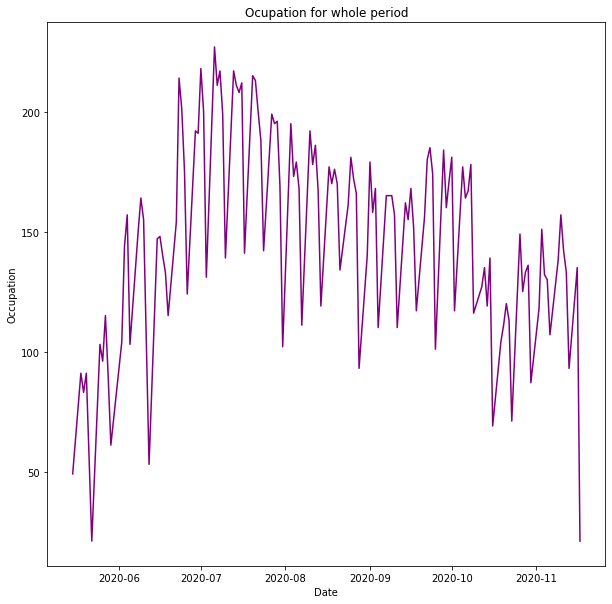

In [3]:
deskusage=pd.read_csv("export_deskusage.csv")
deskusage.head()

dfu=pd.DataFrame(deskusage)

dfu['usageBegin']=pd.to_datetime(dfu.usageBegin)
dfu['usageEnd']=pd.to_datetime(dfu.usageEnd)
dfu['weekday']= pd.to_datetime(dfu['usageBegin']).dt.dayofweek

dfu=dfu.drop(['lastScan','lastUpdate'], axis=1)
dfu = dfu[~dfu["deskNo"].isin([98,99,198,198,298,398,399,498,499,598,599])]
dfu = dfu[~dfu["weekday"].isin([5,6])]

duration=dfu['duration']=(dfu['usageEnd']-dfu['usageBegin'])

dfu=dfu.loc[dfu['duration']>pd.Timedelta(3, unit='h')]

dfu['dateBegin']=pd.to_datetime(dfu.usageBegin).dt.date
dfu['timeBegin']=pd.to_datetime(dfu.usageBegin).dt.time

#df['days'] = float(df['delta'].dt.days)


#dfu['weekday'].value_counts()
#
dfu['one']=1

#df = dfu.groupby('floor', 'dateBegin', 'building')['floor', 'dateBegin', 'building'].transform('count')

gruppiert= dfu.groupby(['floor', 'dateBegin', 'building']).count()['one'].to_frame('count').reset_index()

gruppiertdatum=dfu.groupby(['dateBegin']).count()['one'].to_frame('count').reset_index()


gruppiert['weekday']= pd.to_datetime(gruppiert['dateBegin']).dt.dayofweek



#print(gruppiert.head()) 
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

#plotdf = gruppiertdatum.loc[gruppiertdatum['dateBegin']>'2020-07-01' and gruppiertdatum['dateBegin']<'2020-07-30']

#gruppiertdatum['dateBegin']=pd.to_datetime(gruppiertdatum.dateBegin)

#plotdf = gruppiertdatum[(gruppiertdatum['dateBegin'].Timestamp >= '2020-07-01') 
#& (gruppiertdatum['dateBegin'].Timestamp <= '2020-08-01')]

#print(gruppiertdatum['dateBegin'].dtypes)

# Add x-axis and y-axis
ax.plot('dateBegin',
        'count',
        color='purple', data=gruppiertdatum)

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Occupation",
       title="Ocupation for whole period")

plt.show()


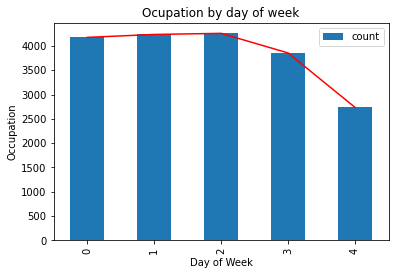

In [241]:
gruppiertweekday=dfu.groupby(['weekday']).count()['one'].to_frame('count').reset_index()

#fig, ax = plt.subplots(figsize=(10, 10))

ax = gruppiertweekday.plot.bar('weekday', 'count')
ax.plot('weekday',
        'count',
        color='red', data=gruppiertweekday)

# Set title and labels for axes
ax.set(xlabel="Day of Week",
       ylabel="Occupation",
       title="Ocupation by day of week")

plt.show()


In [12]:

gruppiertdatum.sort_values(by='count', ascending=True)

,dateBegin,count,Difference
129,2020-11-17,21,-114.0
4,2020-05-22,21,-70.0
17,2020-06-12,53,-102.0
9,2020-05-29,61,-29.0
107,2020-10-16,69,-70.0
...,...,...,...
43,2020-07-20,215,74.0
35,2020-07-08,217,6.0
38,2020-07-13,217,78.0
30,2020-07-01,218,27.0


In [11]:

#str(gruppiertdatum['dateBegin'].dt.month)+"/"+str(gruppiertdatum['dateBegin'].dt.day)+"/"+str(gruppiertdatum['dateBegin'].dt.year)

#date_object = datetime.strptime(date_string, "%d %B, %Y")

gruppiertdatum.dtypes
gruppiertdatum.to_csv('gruppiertdatum.csv')

gruppiertdatum


,dateBegin,count,Difference
1,2020-05-18,91,42.0
2,2020-05-19,83,-8.0
3,2020-05-20,91,8.0
4,2020-05-22,21,-70.0
5,2020-05-25,103,82.0
...,...,...,...
125,2020-11-11,142,-15.0
126,2020-11-12,133,-9.0
127,2020-11-13,93,-40.0
128,2020-11-16,135,42.0


In [10]:


# stationäre Zeitreihe eine ist, deren Mittelwert und Varianz über die Zeit konstant ist. 

############### checking for stationarity
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)





In [9]:
#p-value should be <0.05

ad_test(gruppiertdatum['count'])

1. ADF :  -1.5900301827927044
2. P-Value :  0.4885997403204372
3. Num Of Lags :  9
4. Num Of Observations Used For ADF Regression: 119
5. Critical Values :
	 1% :  -3.4865346059036564
	 5% :  -2.8861509858476264
	 10% :  -2.579896092790057


<AxesSubplot:>

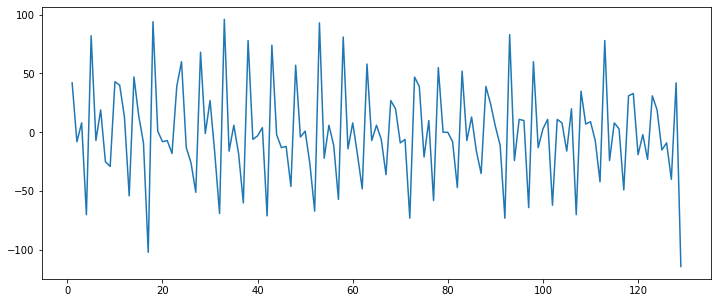

In [8]:
gruppiertdatum['Difference'] = gruppiertdatum['count'] - gruppiertdatum['count'].shift(1)

gruppiertdatum=gruppiertdatum.dropna()

gruppiertdatum['Difference'].plot(figsize=(12,5))


In [13]:

ad_test(gruppiertdatum['Difference'])



1. ADF :  -3.6700720420330533
2. P-Value :  0.004554362716035739
3. Num Of Lags :  8
4. Num Of Observations Used For ADF Regression: 120
5. Critical Values :
	 1% :  -3.486055829282407
	 5% :  -2.8859430324074076
	 10% :  -2.5797850694444446


In [14]:
#parametern wählen

from pmdarima import auto_arima

stepwise_fit = auto_arima(gruppiertdatum['Difference'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1451.334, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1389.709, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1449.374, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1367.956, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1363.225, Time=0.06 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1247.154, Time=0.08 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=1224.827, Time=0.07 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=1213.513, Time=0.16 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=1213.205, Time=0.24 s

In [15]:
#split dataset
 


print(gruppiertdatum.shape)
train=gruppiertdatum.iloc[:-20]
test=gruppiertdatum.iloc[-20:]
print(train.shape,test.shape)



(129, 3)
(109, 3) (20, 3)


/Users/katerynarusnyak/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/katerynarusnyak/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/katerynarusnyak/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/katerynarusnyak/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No su

<AxesSubplot:>

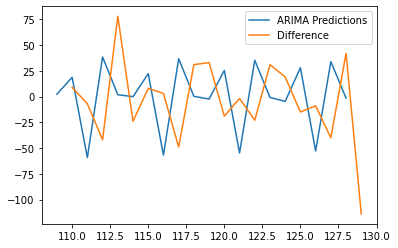

In [236]:

#p is the number of autoregressive terms,
#d is the number of nonseasonal differences needed for stationarity, and
#q is the number of lagged forecast errors in the prediction equation.


from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['Difference'],order=(4,0,5))
model=model.fit()
model.summary()




start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['Difference'].plot(legend=True)

In [110]:

#from pandas.plotting import autocorrelation_plot
#autocorrelation_plot(gruppiertdatum["count"])
#plt.show()


#series =pd.read_csv('gruppiertdatum.csv', squeeze=True)


#import statsmodels.api as sm
#model=sm.tsa.statespace.SARIMAX(gruppiertdatum["count"],order=(1, 1, 1),seasonal_order=(1,1,1,12))
#results=model.fit()
#gruppiertdatum['forecast']=results.predict(start=10,end=120,dynamic=True)
#gruppiertdatum[["count",'forecast']].plot(figsize=(12,8))



#from statsmodels.tsa.arima_model import ARIMA
#model=ARIMA(gruppiertdatum["count"],order=(1,1,1))
#model_fit=model.fit()
#model_fit.summary()

In [18]:
dfu

,deskId,building,floor,orientation,deskNo,usageBegin,usageEnd,weekday,duration,dateBegin,timeBegin,one
0,138,A,1,NE,8,2020-05-15 05:14:33.590,2020-05-15 14:01:56.180,4,0 days 08:47:22.590000,2020-05-15,05:14:33.590000,1
1,246,A,1,SW,15,2020-05-15 06:12:46.480,2020-05-15 14:46:23.080,4,0 days 08:33:36.600000,2020-05-15,06:12:46.480000,1
2,142,A,1,NE,4,2020-05-15 06:25:42.107,2020-05-15 10:36:14.703,4,0 days 04:10:32.596000,2020-05-15,06:25:42.107000,1
3,151,A,1,SE,37,2020-05-15 06:36:07.877,2020-05-15 12:59:45.413,4,0 days 06:23:37.536000,2020-05-15,06:36:07.877000,1
4,149,A,1,SE,39,2020-05-15 06:43:21.603,2020-05-15 14:29:41.640,4,0 days 07:46:20.037000,2020-05-15,06:43:21.603000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
23712,529,B,5,SE,17,2020-11-17 08:15:00.633,2020-11-17 14:23:12.460,1,0 days 06:08:11.827000,2020-11-17,08:15:00.633000,1
23715,563,B,2,NE,20,2020-11-17 08:34:49.743,2020-11-17 14:27:52.263,1,0 days 05:53:02.520000,2020-11-17,08:34:49.743000,1
23720,169,A,1,SE,4,2020-11-17 09:20:08.327,2020-11-17 14:58:54.107,1,0 days 05:38:45.780000,2020-11-17,09:20:08.327000,1
23722,158,A,1,SE,18,2020-11-17 09:23:05.670,2020-11-17 12:43:04.057,1,0 days 03:19:58.387000,2020-11-17,09:23:05.670000,1


In [151]:
#dfu = dfu.drop(dfu.loc['duration']<pd.Timedelta(3, unit='h').index, inplace=True)

#df = df.drop(df.loc[i,'time']<df.loc[i-1,'time'].index)
#duration=dfu['duration']=(dfu['usageEnd']-dfu['usageBegin']).astype('timedelta64[D]')


#dfu['durationDays']=pd.to_datetime(dfu.duration).dt.day


#more=dfu.loc[dfu['duration']>0.0]

#dfu=dfu.loc[dfu['duration']>pd.Timedelta(1, unit='d')]


#for index, row in more.head().iterrows():
     # access data using column names
     #count
     #row['dateBegin']+=1
    #print(index, row['deskNo'], row['orientation'], row['floor'], row['building'], row['dateBegin'], row['duration'])

<function matplotlib.pyplot.show(close=None, block=None)>

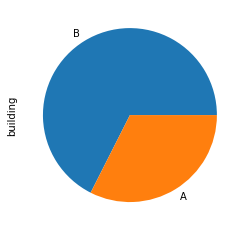

In [15]:

desks.building.value_counts(normalize=True)
desks.building.value_counts(normalize=True).plot.pie()
plt.show

In [18]:
df=pd.DataFrame(desks)

df['building'].value_counts()
#df['floor'].value_counts()
#A=df[df.building=="A"]
#A['floor'].value_counts()

B    308
A    148
Name: building, dtype: int64

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2284 entries, 1958-03-29 to 2001-12-29
Freq: W-SAT
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   co2     2225 non-null   float64
dtypes: float64(1)
memory usage: 35.7 KB
